# DON'T RUN THIS CODE 
i found the best (I think) hyperparameters and the results will change!

In [205]:
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
import numpy as np
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from tensorflow.keras.metrics import BinaryAccuracy
#ROOT_DIR = os.path.dirname(os.path.abspath(__file__))
# Ottieni il percorso della cartella corrente del notebook
current_folder = os.getcwd()
# Trova il percorso della cartella root risalendo la gerarchia delle cartelle
root_folder = current_folder
while 'Project' not in os.listdir(root_folder):
    root_folder = os.path.dirname(root_folder)
# Visualizza il percorso della cartella root
print("Percorso della cartella root:", root_folder)

Percorso della cartella root: /home/af/a22/ML


# Input encoder for monk's and 1-hot-encoder

In [206]:
'''
# normalize the matrix (n.b.: the first column is the label)
# standardize data: ensure that the items will have a defined interval between dateset columns 
def monkScaled(matr):

    scaled_list = []
    # iter on columns 
    for i in range(1, 7):
        # extract the i-th column
        column = matr[:, i]
        
        # linear interpolation so that each value of a column is linearly distributed between 0 to the number of unique values (-1) in that column
        matr[:, i] = np.interp(column, (column.min(), column.max()), (0, len(np.unique(column)) - 1))

        # want the minimum number of bits when 1-hot-encode data
        col_categorical = to_categorical(matr[:, i])

        # define a numpy matrix
        if i != 1:
                scaled_list = np.concatenate((scaled_list, col_categorical), axis=1) #concatenate arrays along the 1 axes
        else: 
            scaled_list = col_categorical #return the array
        
    # input encoding for monk's problems    
    return scaled_list 


def oneHotEncoded(monk_number):

    train_file = "./ds/monks-{}.train".format(monk_number)
    test_file = "./ds/monks-{}.test".format(monk_number)

    # range up to 8 because there's a first blank space to be skipped
    train = np.loadtxt(train_file, delimiter=' ', usecols=range(1, 8))
    test = np.loadtxt(test_file, delimiter=' ', usecols=range(1, 8))

    # get target values
    y = train[:, 0]
    y_test = test[:, 0]

    # scale other values per column between 0 and # unique values for that column
    x = monkScaled(train)
    x_test = monkScaled(test)
    #x=train
    #x_test=test
    return x, y, x_test, y_test
    '''

'\n# normalize the matrix (n.b.: the first column is the label)\n# standardize data: ensure that the items will have a defined interval between dateset columns \ndef monkScaled(matr):\n\n    scaled_list = []\n    # iter on columns \n    for i in range(1, 7):\n        # extract the i-th column\n        column = matr[:, i]\n        \n        # linear interpolation so that each value of a column is linearly distributed between 0 to the number of unique values (-1) in that column\n        matr[:, i] = np.interp(column, (column.min(), column.max()), (0, len(np.unique(column)) - 1))\n\n        # want the minimum number of bits when 1-hot-encode data\n        col_categorical = to_categorical(matr[:, i])\n\n        # define a numpy matrix\n        if i != 1:\n                scaled_list = np.concatenate((scaled_list, col_categorical), axis=1) #concatenate arrays along the 1 axes\n        else: \n            scaled_list = col_categorical #return the array\n        \n    # input encoding for mon

In [207]:
'''
okkk
import numpy as np
from tensorflow.keras.utils import to_categorical

def oneHotEncoded(monk_number):

    train_file = "./ds/monks-{}.train".format(monk_number)
    test_file = "./ds/monks-{}.test".format(monk_number)

    # range up to 8 because there's a first blank space to be skipped
    train = np.loadtxt(train_file, delimiter=' ', usecols=range(1, 8))
    test = np.loadtxt(test_file, delimiter=' ', usecols=range(1, 8))

    # get target values
    y = train[:, 0]
    y_test = test[:, 0]

    # one-hot encode other values per column
    x = oneHotEncode(train[:, 1:])
    x_test = oneHotEncode(test[:, 1:])

    return x, y, x_test, y_test

def oneHotEncode(matrix):
    one_hot_encoded_list = []

    # iter on columns
    for i in range(matrix.shape[1]):
        # extract the i-th column
        column = matrix[:, i]

        # want the minimum number of bits when 1-hot-encode data
        col_categorical = to_categorical(column)

        # define a numpy matrix
        if i != 0:
            one_hot_encoded_list = np.concatenate((one_hot_encoded_list, col_categorical), axis=1)
        else:
            one_hot_encoded_list = col_categorical

    return one_hot_encoded_list
'''

'\nokkk\nimport numpy as np\nfrom tensorflow.keras.utils import to_categorical\n\ndef oneHotEncoded(monk_number):\n\n    train_file = "./ds/monks-{}.train".format(monk_number)\n    test_file = "./ds/monks-{}.test".format(monk_number)\n\n    # range up to 8 because there\'s a first blank space to be skipped\n    train = np.loadtxt(train_file, delimiter=\' \', usecols=range(1, 8))\n    test = np.loadtxt(test_file, delimiter=\' \', usecols=range(1, 8))\n\n    # get target values\n    y = train[:, 0]\n    y_test = test[:, 0]\n\n    # one-hot encode other values per column\n    x = oneHotEncode(train[:, 1:])\n    x_test = oneHotEncode(test[:, 1:])\n\n    return x, y, x_test, y_test\n\ndef oneHotEncode(matrix):\n    one_hot_encoded_list = []\n\n    # iter on columns\n    for i in range(matrix.shape[1]):\n        # extract the i-th column\n        column = matrix[:, i]\n\n        # want the minimum number of bits when 1-hot-encode data\n        col_categorical = to_categorical(column)\n\n    

In [208]:
import numpy as np
from tensorflow.keras.utils import to_categorical

def oneHotEncodeDataset(file_path):
    # Load dataset
    data = np.loadtxt(file_path, delimiter=' ', usecols=range(1, 8))

    # Extract target values
    y = data[:, 0]

    # One-hot encode other values per column
    x = []
    for i in range(1, data.shape[1]):
        column = data[:, i]
        col_categorical = to_categorical(column)
        x.append(col_categorical)

    # Concatenate one-hot encoded columns
    x = np.concatenate(x, axis=1)

    return x, y

# Example usage
#train_file_path = "./ds/monks-1.train"
#test_file_path = "./ds/monks-1.test"

#x_train, y_train = oneHotEncodeDataset(train_file_path)
#x_test, y_test = oneHotEncodeDataset(test_file_path)


In [209]:

def monk_solver(monk_number, eta, alpha, epochs, lmb=None, batch_size=25, n_unit=4, seed=None):
    
    if seed is not None:
        np.random.seed(seed)
        import tensorflow as tf
        tf.random.set_seed(seed)
    # get data
    #x, y, x_test, y_test = oneHotEncodeDataset(monk_number)
     # Construct file paths
    train_file_path = f"./ds/monks-{monk_number}.train"
    test_file_path = f"./ds/monks-{monk_number}.test"

    # get data
    x, y = oneHotEncodeDataset(train_file_path)
    x_test, y_test = oneHotEncodeDataset(test_file_path)

    # create the model
    regularizer = l2(lmb) if lmb else None
    optimizer = SGD(learning_rate=eta, momentum=alpha)
    model = Sequential([
        Dense(n_unit, activation='tanh', kernel_regularizer=regularizer, input_dim=x.shape[1]), #input_dim=17
        Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=[BinaryAccuracy(name='accuracy')])

    res = model.fit(x, y, epochs=epochs, batch_size=batch_size, validation_data=(x_test, y_test), verbose=2)

    # plot results for training set
    plt.plot(res.history['loss'])
    plt.plot(res.history['val_loss'])
    plt.xlabel("Epoch")
    plt.ylabel("MSE")
    plt.legend(['Loss TR', 'Loss TS'], loc='center right')
    plt.title(f'MONK {monk_number} (eta = {eta}, alpha = {alpha}, lambda = {lmb}) - Loss')
    #savePic(monk_number, eta, alpha, lmb)
    plt.show()

    # plot results for "test" (validation) set
    plt.plot(res.history['accuracy'])
    plt.plot(res.history['val_accuracy'])
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend(['Accuracy TR', 'Accuracy TS'], loc='center right')
    plt.title(f'MONK {monk_number} (eta = {eta}, alpha = {alpha}, lambda = {lmb}) - Accuracy')
    plt.show()
    
    return res 
    '''
def monk_solver(monk_number, eta, alpha, epochs, lmb=None, batch_size=25, n_unit=4, seed=None):
    if seed is not None:
        np.random.seed(seed)
        import tensorflow as tf
        tf.random.set_seed(seed)

    # Construct file paths
    train_file_path = f"./ds/monks-{monk_number}.train"
    test_file_path = f"./ds/monks-{monk_number}.test"

    # get data
    x, y = oneHotEncodeDataset(train_file_path)
    x_test, y_test = oneHotEncodeDataset(test_file_path)

    # create the model
    regularizer = l2(lmb) if lmb else None
    optimizer = SGD(learning_rate=eta, momentum=alpha)
    model = Sequential([
        Dense(n_unit, activation='tanh', kernel_regularizer=regularizer, input_dim=x.shape[1]),
        Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=[BinaryAccuracy(name='accuracy')])

    res = model.fit(x, y, epochs=epochs, batch_size=batch_size, validation_data=(x_test, y_test), verbose=2)

    return res
    '''

Epoch 1/120
5/5 - 0s - loss: 0.2755 - accuracy: 0.5403 - val_loss: 0.2802 - val_accuracy: 0.5000 - 330ms/epoch - 66ms/step
Epoch 2/120
5/5 - 0s - loss: 0.2293 - accuracy: 0.6452 - val_loss: 0.2569 - val_accuracy: 0.5833 - 35ms/epoch - 7ms/step
Epoch 3/120
5/5 - 0s - loss: 0.2178 - accuracy: 0.6532 - val_loss: 0.2565 - val_accuracy: 0.5995 - 35ms/epoch - 7ms/step
Epoch 4/120
5/5 - 0s - loss: 0.2072 - accuracy: 0.7097 - val_loss: 0.2379 - val_accuracy: 0.6366 - 35ms/epoch - 7ms/step
Epoch 5/120
5/5 - 0s - loss: 0.1857 - accuracy: 0.7661 - val_loss: 0.2254 - val_accuracy: 0.6412 - 33ms/epoch - 7ms/step
Epoch 6/120
5/5 - 0s - loss: 0.1757 - accuracy: 0.7742 - val_loss: 0.2177 - val_accuracy: 0.6620 - 33ms/epoch - 7ms/step
Epoch 7/120
5/5 - 0s - loss: 0.1648 - accuracy: 0.8145 - val_loss: 0.2090 - val_accuracy: 0.7106 - 35ms/epoch - 7ms/step
Epoch 8/120
5/5 - 0s - loss: 0.1567 - accuracy: 0.8548 - val_loss: 0.2064 - val_accuracy: 0.7222 - 36ms/epoch - 7ms/step
Epoch 9/120
5/5 - 0s - loss: 0

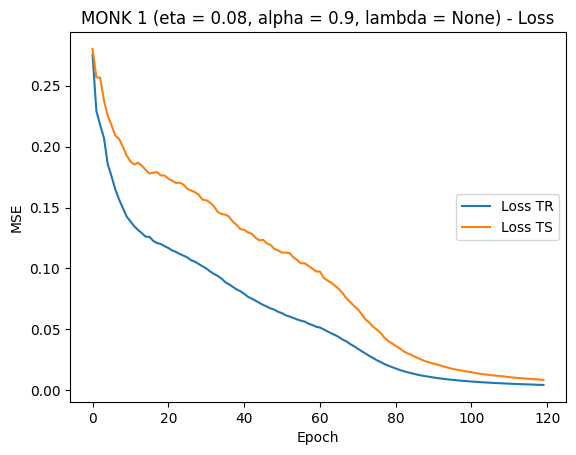

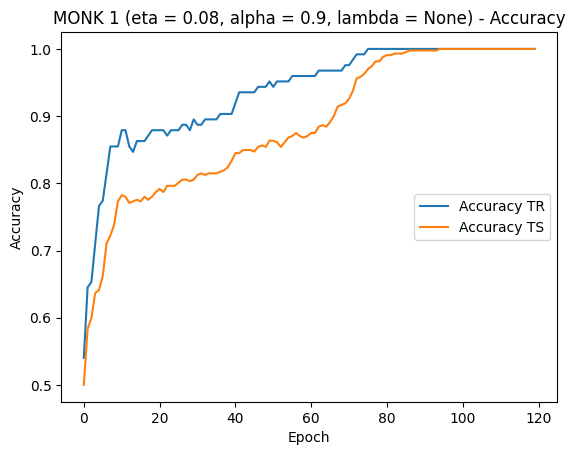

In [217]:

#Best parameters: {'eta': 0.09, 'alpha': 0.9, 'epochs': 100}, Best Accuracy: 1.0
#Best parameters: {'eta': 0.08, 'alpha': 0.9, 'epochs': 120}, Best Accuracy: 1.0
monk_solver(monk_number=1, eta=0.08, alpha=0.9, epochs=120, seed=42)

Epoch 1/60
7/7 - 0s - loss: 0.2477 - accuracy: 0.5917 - val_loss: 0.2239 - val_accuracy: 0.6690 - 322ms/epoch - 46ms/step
Epoch 2/60
7/7 - 0s - loss: 0.2345 - accuracy: 0.5799 - val_loss: 0.2261 - val_accuracy: 0.6181 - 37ms/epoch - 5ms/step
Epoch 3/60
7/7 - 0s - loss: 0.2309 - accuracy: 0.6272 - val_loss: 0.2341 - val_accuracy: 0.5926 - 35ms/epoch - 5ms/step
Epoch 4/60
7/7 - 0s - loss: 0.2307 - accuracy: 0.6095 - val_loss: 0.2186 - val_accuracy: 0.6713 - 35ms/epoch - 5ms/step
Epoch 5/60
7/7 - 0s - loss: 0.2302 - accuracy: 0.6331 - val_loss: 0.2198 - val_accuracy: 0.6412 - 36ms/epoch - 5ms/step
Epoch 6/60
7/7 - 0s - loss: 0.2315 - accuracy: 0.5503 - val_loss: 0.2157 - val_accuracy: 0.6620 - 34ms/epoch - 5ms/step
Epoch 7/60
7/7 - 0s - loss: 0.2216 - accuracy: 0.5680 - val_loss: 0.2164 - val_accuracy: 0.6389 - 36ms/epoch - 5ms/step
Epoch 8/60
7/7 - 0s - loss: 0.2179 - accuracy: 0.6331 - val_loss: 0.2124 - val_accuracy: 0.6667 - 37ms/epoch - 5ms/step
Epoch 9/60
7/7 - 0s - loss: 0.2153 - a

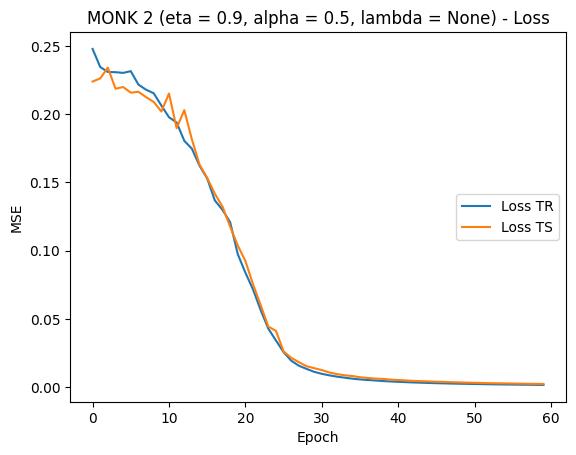

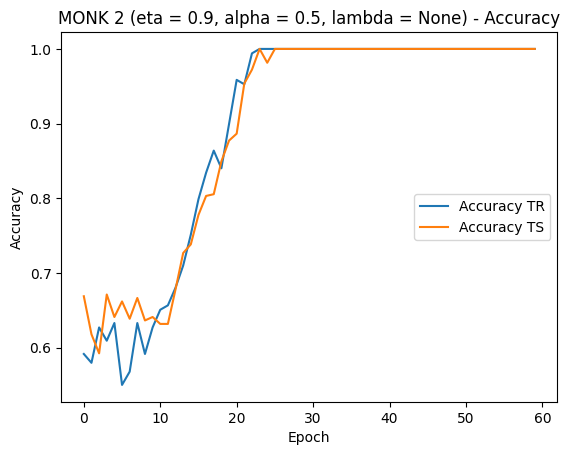

In [221]:
monk_solver(monk_number=2, eta=0.9, alpha=0.5, epochs=60) #idem for this
#Best parameters: {'eta': 0.9, 'alpha': 0.5, 'epochs': 50}, Best Accuracy: 1.0

In [212]:
'''
import itertools

def grid_search(monk_number, eta_values, alpha_values, epochs_values):
    best_accuracy = 0.0
    best_params = {}

    for eta, alpha, epochs in itertools.product(eta_values, alpha_values, epochs_values):
        print(f"Testing parameters: eta={eta}, alpha={alpha}, epochs={epochs}")

        # Run the solver with current parameters and capture the 'res' object
        res = monk_solver(monk_number, eta, alpha, epochs)

        # Update best parameters if accuracy improves
        if res.history['val_accuracy'][-1] > best_accuracy:
            best_accuracy = res.history['val_accuracy'][-1]
            best_params = {'eta': eta, 'alpha': alpha, 'epochs': epochs}

    print(f"Best parameters: {best_params}, Best Accuracy: {best_accuracy}")
    return best_params, best_accuracy



# Define the parameter values to search
eta_values = [0.01,0.03,0.05,0.08,0.09,0.1]
alpha_values = [0.1, 0.2, 0.5, 0.6, 0.9]
epochs_values = [50, 80, 100, 120]


#eta_values = [0.1, 0.15, 0.16, 0.17, 0.18, 0.19]
#alpha_values = [0.5, 0.6, 0.9, 0.95]
#epochs_values = [50, 80, 100]


# Perform grid search for Monk 
best_params, best_accuracy = grid_search(1, eta_values, alpha_values, epochs_values)

print(f"\nBest parameters: {best_params}, Best Accuracy: {best_accuracy}")
'''

'\nimport itertools\n\ndef grid_search(monk_number, eta_values, alpha_values, epochs_values):\n    best_accuracy = 0.0\n    best_params = {}\n\n    for eta, alpha, epochs in itertools.product(eta_values, alpha_values, epochs_values):\n        print(f"Testing parameters: eta={eta}, alpha={alpha}, epochs={epochs}")\n\n        # Run the solver with current parameters and capture the \'res\' object\n        res = monk_solver(monk_number, eta, alpha, epochs)\n\n        # Update best parameters if accuracy improves\n        if res.history[\'val_accuracy\'][-1] > best_accuracy:\n            best_accuracy = res.history[\'val_accuracy\'][-1]\n            best_params = {\'eta\': eta, \'alpha\': alpha, \'epochs\': epochs}\n\n    print(f"Best parameters: {best_params}, Best Accuracy: {best_accuracy}")\n    return best_params, best_accuracy\n\n\n\n# Define the parameter values to search\neta_values = [0.01,0.03,0.05,0.08,0.09,0.1]\nalpha_values = [0.1, 0.2, 0.5, 0.6, 0.9]\nepochs_values = [50, 80, 

Epoch 1/100
5/5 - 0s - loss: 0.3936 - accuracy: 0.3115 - val_loss: 0.3694 - val_accuracy: 0.3356 - 363ms/epoch - 73ms/step
Epoch 2/100
5/5 - 0s - loss: 0.3868 - accuracy: 0.3115 - val_loss: 0.3598 - val_accuracy: 0.3426 - 35ms/epoch - 7ms/step
Epoch 3/100
5/5 - 0s - loss: 0.3749 - accuracy: 0.3279 - val_loss: 0.3476 - val_accuracy: 0.3588 - 37ms/epoch - 7ms/step
Epoch 4/100
5/5 - 0s - loss: 0.3609 - accuracy: 0.3443 - val_loss: 0.3339 - val_accuracy: 0.3657 - 37ms/epoch - 7ms/step
Epoch 5/100
5/5 - 0s - loss: 0.3458 - accuracy: 0.3525 - val_loss: 0.3196 - val_accuracy: 0.3750 - 38ms/epoch - 8ms/step
Epoch 6/100
5/5 - 0s - loss: 0.3304 - accuracy: 0.3852 - val_loss: 0.3053 - val_accuracy: 0.4074 - 39ms/epoch - 8ms/step
Epoch 7/100
5/5 - 0s - loss: 0.3143 - accuracy: 0.4180 - val_loss: 0.2918 - val_accuracy: 0.4352 - 36ms/epoch - 7ms/step
Epoch 8/100
5/5 - 0s - loss: 0.3005 - accuracy: 0.4098 - val_loss: 0.2787 - val_accuracy: 0.4606 - 37ms/epoch - 7ms/step
Epoch 9/100
5/5 - 0s - loss: 0

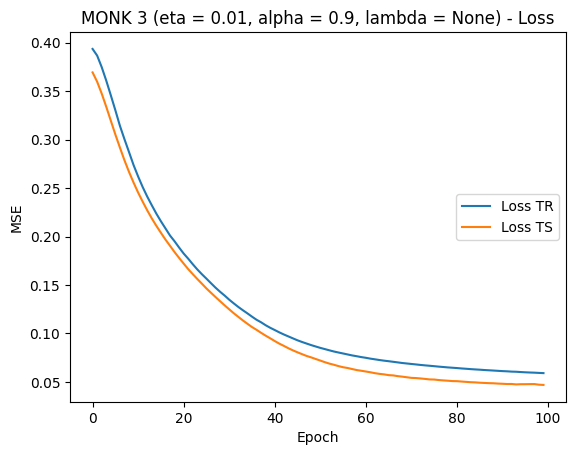

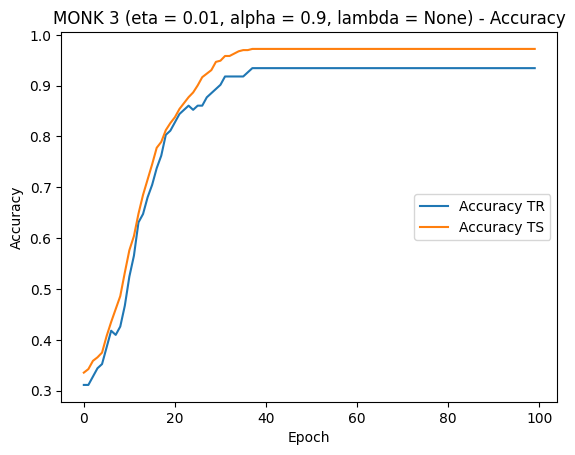

In [225]:
#monk3 this :loss: 0.0184 - accuracy: 0.9836 - val_loss: 0.0231 - val_accuracy: 0.9699 - 32ms/epoch with monk_number=3, eta=0.3, alpha=0.78, epochs=120
#monk_solver(monk_number=3, eta=0.15, alpha=0.3, epochs=80) # look nice: 5/5 - 0s - loss: 0.0248 - accuracy: 0.9836 - val_loss: 0.0241 - val_accuracy: 0.9699 - 31ms/epoch - 6ms/step

#Best parameters: {'eta': 0.1, 'alpha': 0.5, 'epochs': 50}, Best Accuracy: 0.9722222089767456



#Best parameters: {'eta': 0.08, 'alpha': 0.5, 'epochs': 50}, Best Accuracy: 0.9722222089767456
#Best parameters: {'eta': 0.01, 'alpha': 0.9, 'epochs': 80}, Best Accuracy: 0.9722222089767456
monk_solver(monk_number=3, eta=0.01, alpha=0.9, epochs=100)